# Imorting libraies

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv')
pd.set_option('display.max_column',100)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,81566,https://www.airbnb.com/rooms/81566,20230610213045,2023-06-11,city scrape,Rental unit in Haleiwa · ★4.67 · 2 bedrooms · ...,2 bedroom/1 bath ocean view & beach access<br ...,There are so many awesome things to do on the ...,https://a0.muscache.com/pictures/555752/35365a...,442490,...,4.75,4.86,4.62,ta-020-657-9712-01,f,1,1,0,0,1.76
1,81582,https://www.airbnb.com/rooms/81582,20230610213045,2023-06-11,city scrape,Home in Pāhoa · ★4.94 · 2 bedrooms · 3 beds · ...,Quaint retreat COTTAGE; entire 2 bedroom 1 ba...,This is a quaint neighborhood nestled in the O...,https://a0.muscache.com/pictures/555927/be245b...,442698,...,4.94,4.94,4.83,STVR-19-355130,f,2,2,0,0,1.27
2,83221,https://www.airbnb.com/rooms/83221,20230610213045,2023-06-11,city scrape,Cabin in Pāhoa · ★4.93 · 1 bedroom · 1 bed · 1...,The Enchanting Rainforest Hideaway is a very ...,NaN,https://a0.muscache.com/pictures/568427/f7ce56...,451536,...,4.96,4.86,4.94,STVR-19-364512,f,1,1,0,0,2.11
3,5269,https://www.airbnb.com/rooms/5269,20230610213045,2023-06-11,city scrape,Rental unit in Kamuela · ★4.65 · 1 bedroom · 1...,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.88,5.00,4.85,119-269-5808-01R,f,4,4,0,0,0.18
4,84405,https://www.airbnb.com/rooms/84405,20230610213045,2023-06-11,city scrape,Townhouse in Lahaina · ★4.50 · 3 bedrooms · 4 ...,Beautiful three-story condo conveniently nestl...,Location<br />Beach Proximity- short walk acro...,https://a0.muscache.com/pictures/miso/Hosting-...,461037,...,4.50,4.89,4.36,"430020680004, TA-176-565-6576-01",f,22,22,0,0,0.27


In [9]:
df.shape

(32597, 75)

The tuple returned (32597, 75). This means the DataFrame has 32,597 rows and 75 columns.

In [11]:
## Extract Column Names

In [13]:
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

# Rent Statistics 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32597 non-null  int64  
 1   listing_url                                   32597 non-null  object 
 2   scrape_id                                     32597 non-null  int64  
 3   last_scraped                                  32597 non-null  object 
 4   source                                        32597 non-null  object 
 5   name                                          32597 non-null  object 
 6   description                                   32450 non-null  object 
 7   neighborhood_overview                         17729 non-null  object 
 8   picture_url                                   32597 non-null  object 
 9   host_id                                       32597 non-null 

In [43]:
df['price']= df["price"].replace('[\$,]','',regex=True).astype(float)

price_stat = df['price'].describe()
price_stat

count    32597.000000
mean       475.113507
std       1400.798440
min          0.000000
25%        163.000000
50%        259.000000
75%        440.000000
max      99110.000000
Name: price, dtype: float64

The average price of a listing is approximately $475, with a standard deviation of around $1400. This large standard deviation suggests a wide distribution of prices, which is confirmed by the maximum price of $99,110 and the minimum price of $0.


However, the 50% quartile (median) price is $259, and 75% of the listings have a price lower than $440. These figures suggest that there are a few listings with extremely high prices, which are skewing the mean.

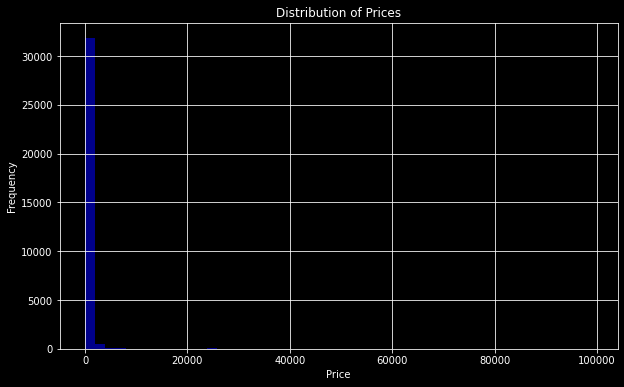

In [66]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.grid()
n, bins, patches = plt.hist(df['price'], bins=50, color = 'darkblue')

# Scale values to interval [0,1]
col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)

plt.title('Distribution of Prices', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.show()

The histogram above displays the distribution of prices, but it’s hard to discern anything from it due to the extreme values or outliers.

To deal with this issue, let’s plot another histogram, this time only including listings with a price less than $1000, which should cover a substantial majority of the listings. This will give us a better sense of the distribution for most listings.



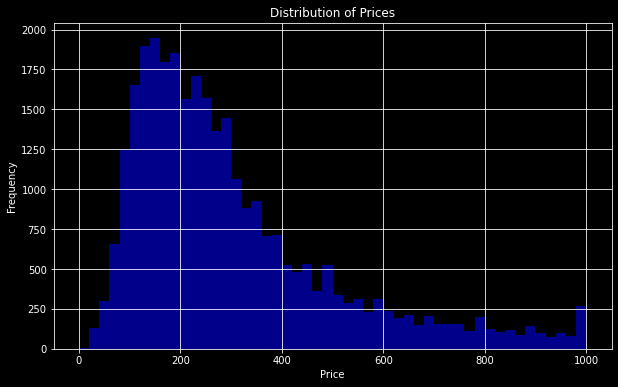

In [91]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.grid()

df_filterd=df[df['price']<=1000]
n, bins, patches = plt.hist(df_filterd['price'], bins=50, color = 'darkblue')

# Scale values to interval [0,1]
col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)
    
plt.title('Distribution of Prices', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.show()

This shows us a much better visual for the distribution of prices. We quickly can determine that majority of the listings are priced around $200 and below.

# Regional Statistics

Lets use the neighbourhood_group_cleansed column, which seems to correspond to larger regions (possibly islands, in this case). Let’s first examine the unique values in this column to confirm.

In [100]:
unique_neighbourhood_group = df['neighbourhood_group_cleansed'].unique()
unique_neighbourhood_group

regional_group_counts = df['neighbourhood_group_cleansed'].value_counts()
regional_group_counts 

Maui        10357
Honolulu     9334
Hawaii       7817
Kauai        5089
Name: neighbourhood_group_cleansed, dtype: int64

Now that we confirmed it is the larger regions in that column we can go ahead and analyze regional stats like distributions of listings.

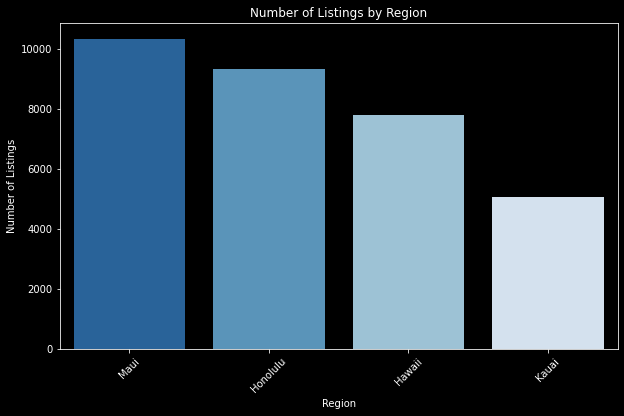

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x =regional_group_counts .index , y=regional_group_counts.values, palette='Blues_r' )

plt.title('Number of Listings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

The ‘Maui’ region has the most listings, followed by ‘Hawaii’, ‘Honolulu’, and ‘Kauai’. The color of the bars ranges from dark blue for the region with the most listings to light blue for the region with the fewest.

Lets view this as a pie chart as well. Using plt.pie and minimal adjustments we can quickly change from the histogram to a pie chart. The code block is below.

<Figure size 576x576 with 0 Axes>

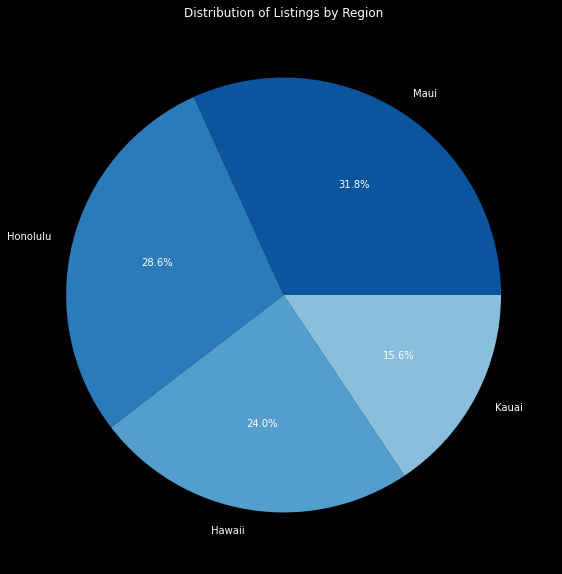

In [133]:
plt.figure(figsize=(8, 8))
plt.figure(figsize=(10,10))
plt.pie(df['neighbourhood_group_cleansed'].value_counts(), labels=df['neighbourhood_group_cleansed'].value_counts().index,  autopct ='%1.1f%%',colors = sns.color_palette("Blues_r"))
plt.title('Distribution of Listings by Region', color='white' )
plt.show()

Now lets explore the average rental price in each region. For that we will need to remove outliers of the data so we can get a better idea of the true average.

In [148]:
# Define the Interquartile Range (IQR) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1 


# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

# Filter the dataframe to exclude outliers
df_filterd = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_filterd 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,81566,https://www.airbnb.com/rooms/81566,20230610213045,2023-06-11,city scrape,Rental unit in Haleiwa · ★4.67 · 2 bedrooms · ...,2 bedroom/1 bath ocean view & beach access<br ...,There are so many awesome things to do on the ...,https://a0.muscache.com/pictures/555752/35365a...,442490,https://www.airbnb.com/users/show/442490,Susan,2011-03-14,"Haleiwa, HI",Aloha . . . you'll never believe it until you ...,within a few hours,100%,92%,t,https://a0.muscache.com/im/pictures/user/53e2a...,https://a0.muscache.com/im/pictures/user/53e2a...,North Shore,1.0,1.0,"['email', 'phone']",t,t,"Haleiwa, Hawaii, United States",North Shore Oahu,Honolulu,21.589247,-158.111008,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Freezer"", ""Baking sheet"", ""Clo...",250.0,4,1125,4,4,1125,1125,4.0,1125.0,NaN,t,3,9,23,249,2023-06-11,260,15,3,2011-05-05,2023-06-08,4.67,4.70,4.76,4.85,4.75,4.86,4.62,ta-020-657-9712-01,f,1,1,0,0,1.76
1,81582,https://www.airbnb.com/rooms/81582,20230610213045,2023-06-11,city scrape,Home in Pāhoa · ★4.94 · 2 bedrooms · 3 beds · ...,Quaint retreat COTTAGE; entire 2 bedroom 1 ba...,This is a quaint neighborhood nestled in the O...,https://a0.muscache.com/pictures/555927/be245b...,442698,https://www.airbnb.com/users/show/442698,Elizabeth,2011-03-15,"Kailua-Kona, HI","Originally from Canada, I've been living in Ko...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/442698/profil...,https://a0.muscache.com/im/users/442698/profil...,Island of Hawaiʻi,3.0,3.0,"['email', 'phone']",t,t,"Pāhoa, Hawaii, United States",Puna,Hawaii,19.434280,-155.216090,Entire home,Entire home/apt,4,NaN,1 bath,2.0,3.0,"[""Bed linens"", ""Pack \u2019n play/Travel crib""...",119.0,2,10,2,2,10,10,2.0,10.0,NaN,t,20,48,69,69,2023-06-11,181,54,3,2011-09-30,2023-06-03,4.94,4.97,4.91,4.94,4.94,4.94,4.83,STVR-19-355130,f,2,2,0,0,1.27
2,83221,https://www.airbnb.com/rooms/83221,20230610213045,2023-06-11,city scrape,Cabin in Pāhoa · ★4.93 · 1 bedroom · 1 bed · 1...,The Enchanting Rainforest Hideaway is a very ...,NaN,https://a0.muscache.com/pictures/568427/f7ce56...,451536,https://www.airbnb.com/users/show/451536,Connie And Andrew,2011-03-19,"Hawaii, United States","We are a fun loving, adventurous couple, livi...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/451536/profil...,https://a0.muscache.com/im/users/451536/profil...,Island of Hawaiʻi,1.0,2.0,"['email', 'phone']",t,t,NaN,Puna,Hawaii,19.539790,-155.002070,Entire cabin,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""Freezer"", ""Bathtub"", ""Baking s...",117.0,3,30,3,3,1125,1125,3.0,1125.0,NaN,t,16,25,53,323,2023-06-11,311,23,0,2011-05-06,2023-05-09

In [166]:
average_price_by_region = df_filterd.groupby('neighbourhood_group_cleansed')['price'].mean()

In [163]:
average_price_by_region

neighbourhood_group_cleansed
Hawaii      241.487628
Honolulu    235.126257
Kauai       346.506658
Maui        330.795547
Name: price, dtype: float64

Next, let’s visualize this data with a bar chart.

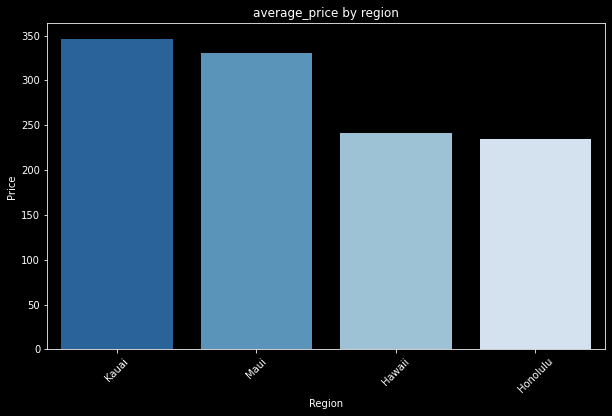

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x = average_price_by_region.sort_values(ascending=False).index,y = average_price_by_region.sort_values(ascending=False).values,palette ='Blues_r')
plt.title('average_price by region',)
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

From the chart, we can see that the ‘Kauai’ region has the highest average rental price, followed closely by ‘Maui’. The ‘Hawaii’ and ‘Honolulu’ regions have slightly lower average prices.

Next lets analyze the amount of reviews for each region in the code block below.



In [209]:
total_reviews_per_region = df.groupby('neighbourhood_group_cleansed')['number_of_reviews'].sum().sort_values(ascending=False)
total_reviews_per_region

neighbourhood_group_cleansed
Hawaii      328121
Maui        317890
Honolulu    313738
Kauai       126039
Name: number_of_reviews, dtype: int64

Next, let’s visualize this data with a bar chart.

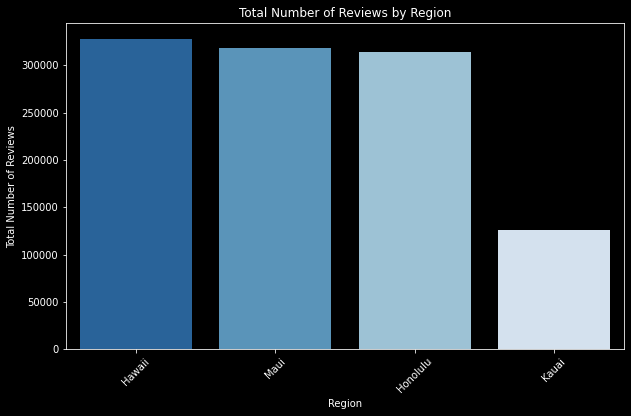

In [210]:
# Set the style to dark
plt.style.use("dark_background")

# Create a bar plot of the total number of reviews in each region
plt.figure(figsize=(10, 6))
sns.barplot(x=total_reviews_per_region.index, y=total_reviews_per_region.values, palette='Blues_r')
plt.title('Total Number of Reviews by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

From the chart, we can see that the ‘Hawaii’ region has the most reviews, followed closely by ‘Maui’ and ‘Honolulu’. The ‘Kauai’ region has significantly fewer reviews. This visual provides a clear understanding of how guest activity (as measured by the number of reviews) is distributed across different regions.

__Interesting to note that Kauai has the least amount of reviews but the most expensive rent prices.__

## Property Type
Lets use the column property_type to calculate the top 10 property types among all the regions.

In [226]:
# calculate the distribution of proprety_type 
prop_type_dist = df['property_type'].value_counts()
prop_type_dist.head(10)

Entire condo                 15685
Entire rental unit            4415
Entire home                   3736
Entire serviced apartment     1443
Private room in resort         854
Room in hotel                  710
Entire guest suite             645
Private room in home           618
Entire villa                   605
Entire townhouse               576
Name: property_type, dtype: int64

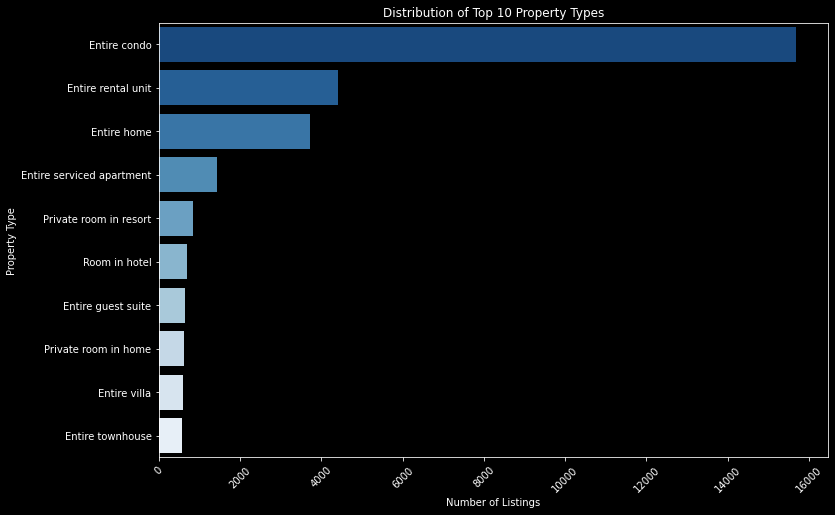

In [240]:
plt.figure(figsize=(12,8))
sns.barplot(x= prop_type_dist.head(10).values, y = prop_type_dist.head(10).index, palette= 'Blues_r')
plt.title('Distribution of Top 10 Property Types', color='white')
plt.xlabel('Number of Listings', color='white')
plt.ylabel('Property Type', color='white')
plt.xticks(rotation = 45)
plt.show()

Here’s a bar chart that visualizes the distribution of the top 10 property types in the dataset:

* Etire condo is the 'most' common property type, followed by Entire rental unit and `Entire home`.


* Other property types in the top 10 include Entire serviced apartment, Private room in resort, Room in hotel, Entire guest suite, Private room in home, Entire villa, and Entire townhouse.

In [259]:
proprety_type_by_avg_price = df_filterd.groupby('property_type')['price'].mean().head(20).sort_values(ascending=False)
proprety_type_by_avg_price

property_type
Entire home/apt             375.641304
Entire home                 364.845793
Entire chalet               308.500000
Entire condo                283.146584
Entire bungalow             278.277228
Barn                        277.000000
Entire cottage              249.383686
Casa particular             245.800000
Entire place                230.047619
Earthen home                200.000000
Dome                        198.714286
Entire loft                 188.266667
Bus                         177.000000
Entire guesthouse           176.041754
Entire guest suite          162.632558
Entire cabin                147.223214
Camper/RV                   138.902913
Entire bed and breakfast    104.000000
Campsite                     60.000000
Cycladic home                28.000000
Name: price, dtype: float64

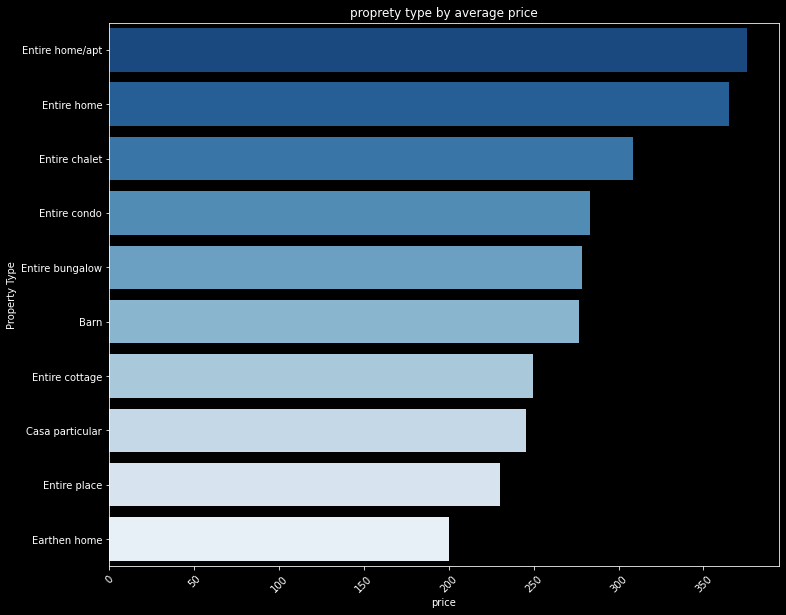

In [267]:
plt.figure(figsize=(12,10))
sns.barplot(x= proprety_type_by_avg_price.head(10).values, y = proprety_type_by_avg_price.head(10).index, palette= 'Blues_r')
plt.title('proprety type by average price', color='white')
plt.xlabel('price', color='white')
plt.ylabel('Property Type', color='white')
plt.xticks(rotation = 45)
plt.show()

We note that the maximum average price for Entire home/apt followed by Entire home followed by entire chalet and entire condo 
but the Entire Condo is the most common proprety type

### Minimum Nights
Analyzing the minimum night distribution will provide insights into the rental patterns and preferences of hosts and guests. This information could be useful to understand the flexibility of booking stays and the types of guests that may be targeted (e.g., short-term tourists vs. long-term renters).

We can start by exploring the distribution of the minimum nights required for bookings across all listings and then visualize this distribution using a histogram.

Let’s begin with a summary of the distribution of minimum nights:

In [277]:
df['minimum_nights'].describe()

count    32597.000000
mean         7.653250
std         23.108627
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1000.000000
Name: minimum_nights, dtype: float64

Oops we have outliers

Let’s create a histogram to visualize this distribution, focusing on the more common values (e.g., up to 30 nights) to better understand the main patterns.

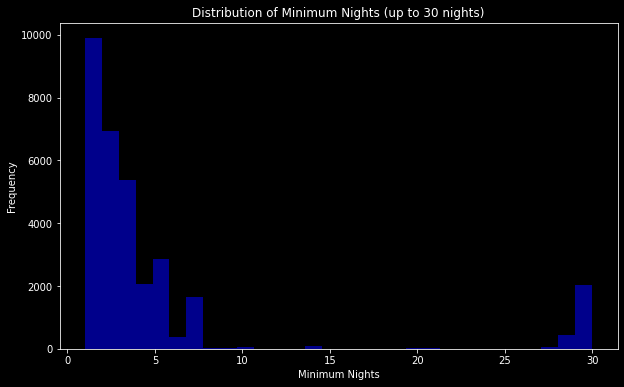

In [295]:
plt.figure(figsize=(10,6))
plt.hist(df[df['minimum_nights'] <=30 ]['minimum_nights'],bins= 30, color = 'darkblue')
plt.title('Distribution of Minimum Nights (up to 30 nights)', color='white')
plt.xlabel('Minimum Nights', color='white')
plt.ylabel('Frequency', color='white')

plt.show()

This visualization provides a clear understanding of the typical minimum stay requirements for listings, with the majority targeting short-term stays.

## First Booking
Let’s proceed by calculating the time it took for listings to receive their first booking and then analyze the distribution of this time.


To perform this analysis, we need information about the date when the listing was created and the date of the first booking. Columns`host_since` and `first_review` will be used to calculate this.

In [305]:
# Convert host_since and first_review columns to datetime objects
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'] )

In [306]:
df[['host_since','first_review']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host_since    32595 non-null  datetime64[ns]
 1   first_review  24919 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 509.5 KB


In [313]:
# Calculate the time it took for listings to receive their first booking (in days)
df['time_to_first_booking'] = (df['first_review'] - df['host_since']).dt.days

# Get basic statistics for the time_to_first_booking column
time_to_first_booking_stats = df['time_to_first_booking'].describe()

time_to_first_booking_stats

count    24917.000000
mean      1305.525424
std       1045.479196
min      -3427.000000
25%        349.000000
50%       1211.000000
75%       2075.000000
max       5365.000000
Name: time_to_first_booking, dtype: float64

0          52.0
1         199.0
2          48.0
3         841.0
4        1320.0
          ...  
32592       NaN
32593       NaN
32594       NaN
32595       NaN
32596       NaN
Name: time_to_first_booking, Length: 32597, dtype: float64

It appears that there is a wide range of values for the time to the first booking, with some listings receiving their first booking relatively quickly and others taking several years. The negative minimum value likely indicates an issue with the data, such as incorrect dates.

Lets visualize this in a bar chart

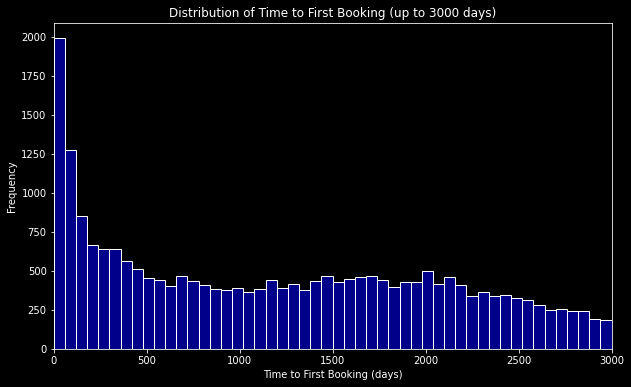

In [318]:
# Create a histogram for the distribution of time to first booking (excluding negative values and focusing on up to 3000 days)
plt.figure(figsize=(10, 6))
plt.hist(df[df['time_to_first_booking'] > 0]['time_to_first_booking'], bins=50, range=(0, 3000), edgecolor='white', color = 'darkblue')

# Scale values to interval [0,1]
col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)



plt.title('Distribution of Time to First Booking (up to 3000 days)', color='white')
plt.xlabel('Time to First Booking (days)', color='white')
plt.ylabel('Frequency', color='white')
plt.xlim(0, 3000)  # Limit the x-axis to 3000 days
plt.show()

Here’s a histogram that visualizes the distribution of the time it took for listings to receive their first booking, focusing on up to 3000 days (approximately 8.2 years):

* Most listings received their first booking within the first few hundred days.
* There is a gradual decline in frequency as the time to the first booking increases.

* Some listings took several years to receive their first booking.
This visualization provides insights into how quickly listings tend to get booked and the variability in the time to the first booking.



## Host Ownership

Analyzing hosts with multiple listings can provide insights into the dynamics of professional hosting vs. individual hosting within the platform.

We’ll start by identifying hosts with multiple listings and then analyze the distribution of the number of listings per host. This will help us understand how many hosts have just one listing compared to those who manage multiple properties.

In [319]:
# Calculate the number of listings for each host
host_listings_count = df['host_id'].value_counts()

# Get basic statistics for the number of listings per host
host_listings_stats = host_listings_count.describe()

# Display the statistics
host_listings_stats

count    8936.000000
mean        3.647829
std        16.908069
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       457.000000
Name: host_id, dtype: float64

It appears that the majority of hosts have only one or two listings, but there are a few hosts with a large number of listings, which increases the average.

Let’s create a histogram to visualize this distribution, focusing on the more common values to better understand the main patterns.

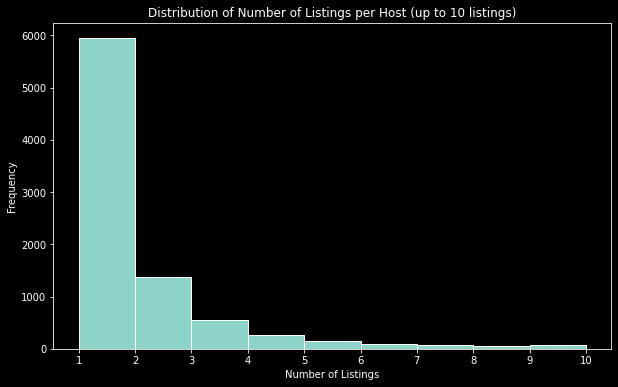

In [321]:
# Create a histogram for the distribution of the number of listings per host (focusing on up to 10 listings)
plt.figure(figsize=(10, 6))
plt.hist(host_listings_count, bins=range(1, 11), edgecolor='white')

# Scale values to interval [0,1]
col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)

plt.title('Distribution of Number of Listings per Host (up to 10 listings)', color='white')
plt.xlabel('Number of Listings', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(range(1, 11))
plt.show()


Here’s the histogram that visualizes the distribution of the number of listings per host, focusing on up to 10 listings.

The chart shows that:

The vast majority of hosts have only one listing.
The number of hosts with multiple listings decreases sharply as the number of listings increases.
Very few hosts manage more than a handful of listings.

## Host Ownership Per Region
Let’s analyze host ownership and determine which island is most popular with the hosts.

Let’s continue with the analysis:

In [322]:
# Group the listings by neighbourhood_group_cleansed (regions) and count the unique hosts in each region
host_per_region = df.groupby('neighbourhood_group_cleansed')['host_id'].nunique().sort_values(ascending=False)

# Display the number of unique hosts for each region (island)
host_per_region

neighbourhood_group_cleansed
Honolulu    2971
Hawaii      2897
Maui        2407
Kauai       1064
Name: host_id, dtype: int64

Honolulu has the highest number of unique hosts, followed closely by Hawaii and then Maui. Kauai has the fewest unique hosts among the islands.

Let’s visualize this:

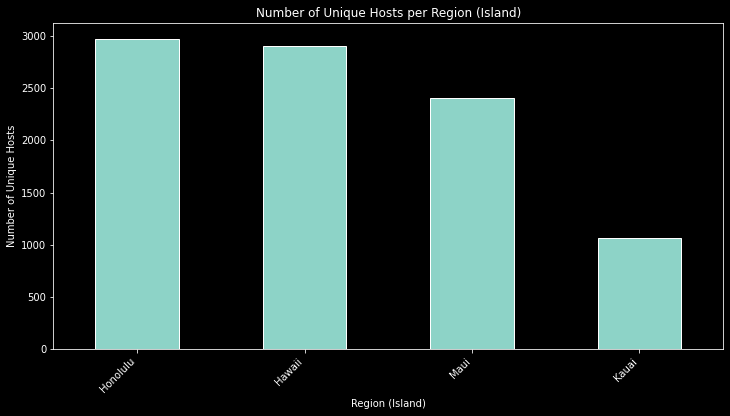

In [325]:
# Plot a bar chart to visualize the number of unique hosts in each region using the defined color palette
plt.figure(figsize=(12, 6))
host_per_region.plot(kind='bar', edgecolor='white')
plt.title('Number of Unique Hosts per Region (Island)', color='white')
plt.xlabel('Region (Island)', color='white')
plt.ylabel('Number of Unique Hosts', color='white')
plt.xticks(rotation=45, ha='right')
plt.show()

This analysis provides insights into the popularity of different regions with hosts and can help in understanding the distribution of properties across the islands.

### Conclusion

In conclusion, this analysis presented a multifaceted exploration of Airbnb listings across the Hawaiian Islands, delivering insightful perspectives into the vacation rental environment in this tropical paradise. The findings from this project are poised to empower both hosts and guests in making well-informed decisions. For hosts, the comprehensive examination of regional preferences, price distribution, and property types offers guidance on positioning their listings optimally, from setting competitive prices to selecting desirable locations. For guests, the rich analysis paints a vivid picture of the rental landscape, illuminating factors such as typical minimum stay requirements, booking lead times, and hotspots for premium properties. By distilling intricate data into tangible insights, this study enhances the understanding of Hawaii’s Airbnb market, providing valuable intelligence for anyone engaged in the island’s thriving rental ecosystem.